In [1]:
import pandas as pd 
import numpy as np
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
import lightgbm as lgb

from sklearn.dummy import DummyClassifier

# To use in feature selection
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    RocCurveDisplay,
    # plot_roc_curve,
)

# To be used for data scaling and encoding
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# set the background for the graphs
plt.style.use("ggplot")


# To supress warnings
import warnings

# date time
import time
from datetime import datetime

In [2]:
import pyarrow.parquet as pq
path = 'Data/Prob2/raw_train.parquet'
df = pq.read_table(source=path).to_pandas()

In [3]:
df.head(8)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,label
0,V1,4.782,V2,V8,1337.025,V4,V4,2.000,V2,V0,4.000,V2,35.689,none,V1,1.000,V2,1.000,none,yes,0
1,V3,22.765,V4,V2,1664.415,V0,V4,4.000,V1,V0,2.000,V0,23.266,none,V1,2.000,V2,1.000,none,yes,0
2,V3,7.462,V2,V3,750.653,V3,V2,4.000,V2,V0,4.000,V2,34.061,stores,V0,1.000,V2,1.000,yes,yes,0
3,V3,23.718,V4,V7,4829.002,V4,V2,4.000,V1,V0,4.000,V3,62.477,none,V1,2.000,V1,1.000,none,yes,0
4,V3,13.769,V3,V3,3559.956,V3,V4,1.000,V1,V0,4.000,V2,41.999,bank,V1,1.000,V2,1.000,yes,yes,0
5,V3,12.012,V2,V0,1700.481,V1,V0,4.000,V2,V0,4.000,V0,45.268,none,V0,1.000,V3,1.000,yes,yes,0
6,V3,11.685,V2,V2,2434.941,V0,V4,1.000,V1,V0,4.000,V1,26.764,none,V1,1.000,V3,1.000,yes,yes,0
7,V0,12.309,V3,V0,491.338,V4,V4,4.000,V0,V0,2.000,V2,39.608,none,V0,1.000,V2,1.000,yes,yes,1


## Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   60000 non-null  object 
 1   feature2   60000 non-null  float64
 2   feature3   60000 non-null  object 
 3   feature4   60000 non-null  object 
 4   feature5   60000 non-null  float64
 5   feature6   60000 non-null  object 
 6   feature7   60000 non-null  object 
 7   feature8   60000 non-null  float64
 8   feature9   60000 non-null  object 
 9   feature10  60000 non-null  object 
 10  feature11  60000 non-null  float64
 11  feature12  60000 non-null  object 
 12  feature13  60000 non-null  float64
 13  feature14  60000 non-null  object 
 14  feature15  60000 non-null  object 
 15  feature16  60000 non-null  float64
 16  feature17  60000 non-null  object 
 17  feature18  60000 non-null  float64
 18  feature19  60000 non-null  object 
 19  feature20  60000 non-null  object 
 20  label 

In [5]:
df.describe(include="object").T

,count,unique,top,freq
feature1,60000,4,V3,23659
feature3,60000,5,V2,31782
feature4,60000,11,V3,16634
feature6,60000,5,V0,35846
feature7,60000,5,V2,20178
feature9,60000,5,V2,32919
feature10,60000,3,V0,54407
feature12,60000,4,V2,19540
feature14,60000,3,none,48517
feature15,60000,3,V1,42275


In [6]:
df.describe(include="float64").T

,count,mean,std,min,25%,50%,75%,max
feature2,60000.000,20.863,12.083,0.649,11.959,18.088,24.903,73.202
feature5,60000.000,3207.836,2792.931,-5997.670,1388.208,2273.676,3813.300,19046.986
feature8,60000.000,2.954,1.121,1.000,2.000,3.000,4.000,4.000
feature11,60000.000,2.837,1.105,1.000,2.000,3.000,4.000,4.000
feature13,60000.000,35.641,11.261,17.674,27.186,33.135,40.959,82.179
feature16,60000.000,1.422,0.606,1.000,1.000,1.000,2.000,4.000
feature18,60000.000,1.159,0.366,1.000,1.000,1.000,1.000,2.000


In [7]:
# Below function prints unique value counts and percentages for the category/object type variables


def category_unique_value():
    for col in df.select_dtypes(include=[np.int64, np.float64]).columns.unique().to_list():
        print("Unique values and corresponding data counts for feature: " + col)
        print("Nunique value:", df[col].nunique())
        print("-" * 90)
#         df_temp = pd.concat(
#             [
#                 df[col].value_counts(),                          
#                 df[col].value_counts(normalize=True) * 100,
#             ],
#             axis=1,
#         )
#         df_temp.columns = ["Count", "Percentage"]
#         print(df_temp)
#         print("-" * 90, '\n'*3)

category_unique_value()

Unique values and corresponding data counts for feature: feature2
Nunique value: 59889
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: feature5
Nunique value: 60000
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: feature8
Nunique value: 4
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: feature11
Nunique value: 4
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: feature13
Nunique value: 59952
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: feature16
Nunique value: 4
--------------------------------

In [8]:
# Random state and loss
seed = 2023
loss_func = "logloss"

# Test and Validation sizes
test_size = 0.1
val_size = 1/9


# Splitting the dataset into dependent and independent variable sets
# X,y = data.drop(columns=["label"]),  data["label"].map(target_mapper)
X, y = df.drop('label', axis=1),  df["label"]

# Splitting data into training, validation and test set

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_size, random_state=seed, stratify=y_temp
)
print(
    "Training data shape:\n",
    X_train.shape,
    "\nValidation Data Shape:\n",
    X_val.shape,
    "\nTesting Data Shape:\n",
    X_test.shape,
)

Training data shape:
 (48000, 20) 
Validation Data Shape:
 (6000, 20) 
Testing Data Shape:
 (6000, 20)


## Data preprocessing

In [9]:
# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin

# Building a function to standardize columns

def feature_name_standardize(df: pd.DataFrame):
    df_ = df.copy()
    df_.columns = [i.replace(" ", "_").lower() for i in df_.columns]
    return df_

# Building a function to drop features

def drop_feature(df: pd.DataFrame, features: list = []):
    df_ = df.copy()
    if len(features) != 0:
        df_ = df_.drop(columns=features)
        
    return df_

# Building a function to treat incorrect value

def mask_value(df: pd.DataFrame, feature: str = None, value_to_mask: str = None, masked_value: str = None):
    df_ = df.copy()
    if feature != None and value_to_mask != None:
        if feature in df_.columns:
            df_[feature] = df_[feature].astype('object')
            df_.loc[df_[df_[feature] == value_to_mask].index, feature] = masked_value
            df_[feature] = df_[feature].astype('category')
            
    return df_

# Building a custom imputer

def impute_category_unknown(df: pd.DataFrame, fill_value: str):
    df_ = df.copy()
    for col in df_.select_dtypes(include='category').columns.tolist():
        df_[col] = df_[col].astype('object')
        df_[col] = df_[col].fillna('Unknown')
        df_[col] = df_[col].astype('category')
    return df_

# Building a custom data preprocessing class with fit and transform methods for standardizing column names

class FeatureNamesStandardizer(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Returns dataframe with column names in lower case with underscores in place of spaces."""
        X_ = feature_name_standardize(X)
        return X_
    
    
# Building a custom data preprocessing class with fit and transform methods for dropping columns

class ColumnDropper(TransformerMixin):
    def __init__(self, features: list):
        self.features = features

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Given a list of columns, returns a dataframe without those columns."""
        X_ = drop_feature(X, features=self.features)
        return X_
        
    

# Building a custom data preprocessing class with fit and transform methods for custom value masking

class CustomValueMasker(TransformerMixin):
    def __init__(self, feature: str, value_to_mask: str, masked_value: str):
        self.feature = feature
        self.value_to_mask = value_to_mask
        self.masked_value = masked_value

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = mask_value(X, self.feature, self.value_to_mask, self.masked_value)
        return X_
    
    
# Building a custom class to one-hot encode using pandas
class PandasOneHot(TransformerMixin):
    def __init__(self, columns: list = None):
        self.columns = columns

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = pd.get_dummies(X, columns = self.columns, drop_first=True)
        return X_
    
# Building a custom class to fill nulls with Unknown
class FillUnknown(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = impute_category_unknown(X, fill_value='Unknown')
        return X_

In [10]:
# Select columns with dtype 'float'
num_columns_names = df.select_dtypes(include=['float64']).columns.to_list()

# Print the selected columns
print(num_columns_names)

['feature2', 'feature5', 'feature8', 'feature11', 'feature13', 'feature16', 'feature18']


In [11]:
# Select columns with dtype 'object'
obj_columns_names = df.select_dtypes(include=['object']).columns.to_list()

# Print the selected columns
print(obj_columns_names)

['feature1', 'feature3', 'feature4', 'feature6', 'feature7', 'feature9', 'feature10', 'feature12', 'feature14', 'feature15', 'feature17', 'feature19', 'feature20']


### Standardize feature names

In [12]:
feature_name_standardizer = FeatureNamesStandardizer()

X_train = feature_name_standardizer.fit_transform(X_train)
X_val = feature_name_standardizer.transform(X_val)
X_test = feature_name_standardizer.transform(X_test)

In [13]:
X_train.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20
15809,V3,24.861,V2,V3,2557.035,V4,V4,4.000,V2,V0,4.000,V1,39.751,none,V1,1.000,V2,1.000,none,yes
18669,V1,24.838,V2,V0,4253.122,V0,V3,4.000,V1,V0,2.000,V1,33.179,none,V1,1.000,V1,1.000,none,yes
10131,V1,12.404,V4,V3,1560.573,V4,V3,3.000,V1,V0,3.000,V2,23.016,none,V1,2.000,V2,2.000,yes,yes
25303,V0,11.893,V4,V3,876.914,V0,V1,4.000,V3,V0,3.000,V1,22.581,stores,V0,2.000,V2,1.000,yes,yes
5651,V0,14.334,V2,V9,4807.648,V1,V1,1.000,V3,V0,1.000,V3,54.769,none,V2,1.000,V2,1.000,none,yes


### Impute categorical Nulls to Unknown

In [14]:
cat_columns = X_train.select_dtypes(include="category").columns.tolist()
imputer = FillUnknown()

X_train[cat_columns] = imputer.fit_transform(X_train[cat_columns])
X_val[cat_columns] = imputer.transform(X_val[cat_columns])
X_test[cat_columns] = imputer.transform(X_test[cat_columns])

In [15]:
X_train.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20
15809,V3,24.861,V2,V3,2557.035,V4,V4,4.000,V2,V0,4.000,V1,39.751,none,V1,1.000,V2,1.000,none,yes
18669,V1,24.838,V2,V0,4253.122,V0,V3,4.000,V1,V0,2.000,V1,33.179,none,V1,1.000,V1,1.000,none,yes
10131,V1,12.404,V4,V3,1560.573,V4,V3,3.000,V1,V0,3.000,V2,23.016,none,V1,2.000,V2,2.000,yes,yes
25303,V0,11.893,V4,V3,876.914,V0,V1,4.000,V3,V0,3.000,V1,22.581,stores,V0,2.000,V2,1.000,yes,yes
5651,V0,14.334,V2,V9,4807.648,V1,V1,1.000,V3,V0,1.000,V3,54.769,none,V2,1.000,V2,1.000,none,yes


### Category Encoder

In [16]:
import category_encoders as ce

In [17]:
cols = ['feature8', 'feature11', 'feature16', 'feature18'] + obj_columns_names

# Create an instance of the TargetEncoder
encoder = ce.TargetEncoder(cols=cols)

# Fit and transform the data
X_train = encoder.fit_transform(X_train, y_train)
X_val = encoder.transform(X_val)
X_test = encoder.transform(X_test)

### Scaling

In [18]:
for col in ['feature2', 'feature5', 'feature13']: 
#     sc = RobustScaler(with_centering=True, with_scaling=True)
    sc = StandardScaler()
    scale_train = sc.fit_transform(X_train[col].values.reshape(-1, 1))
    scale_test = sc.transform(X_test[col].values.reshape(-1, 1))
    scale_val = sc.transform(X_val[col].values.reshape(-1, 1))
    
    # Assign the scaled data back
    X_train.loc[:, col] = scale_train.flatten()
    X_test.loc[:, col] = scale_test.flatten()
    X_val.loc[:, col] = scale_val.flatten()


## Correlation

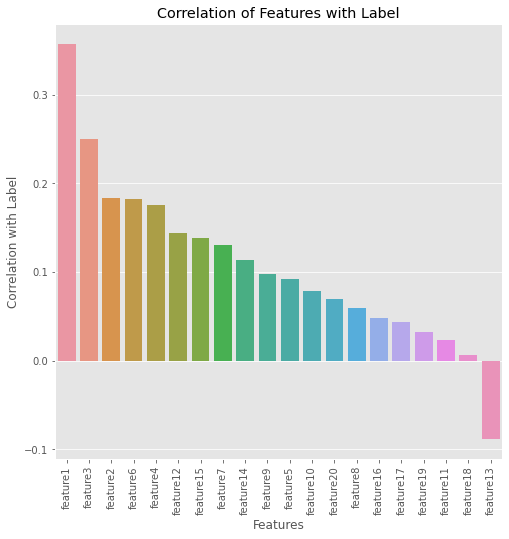

In [19]:
df_train = pd.concat([X_train, y_train], axis=1)
correlation_label = df_train.corr()['label']
correlation_label = correlation_label.drop('label').sort_values(ascending=False)

plt.figure(figsize=(8, 8))
sns.barplot(x=correlation_label.index, y=correlation_label.values)
plt.xlabel('Features')
plt.ylabel('Correlation with Label')
plt.title('Correlation of Features with Label')
plt.xticks(rotation=90)
plt.show()

## Label

([<matplotlib.patches.Wedge at 0x7f7002fbe630>,
 [Text(-0.6365048996877849, 0.8971407429570027, '0'),
  Text(0.6365048996877848, -0.8971407429570029, '1')],
 [Text(-0.34718449073879176, 0.4893494961583651, ' 69.64%\n 41785'),
  Text(0.3471844907387917, -0.48934949615836515, ' 30.36%\n 18215')])

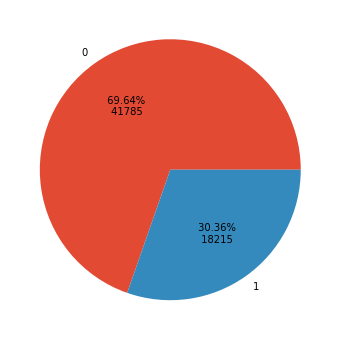

In [20]:
total = df['label'].value_counts().sum()
def fmt(x):
    return f'{x: .2f}%\n{total * x / 100: .0f}'

plt.figure(figsize=(6, 6))
plt.pie(df['label'].value_counts().values, labels=df['label'].value_counts().index, autopct=fmt)

In [21]:
print(
    "Training data shape:\n",
    X_train.shape,
    "\nValidation Data Shape:\n",
    X_val.shape,
    "\nTesting Data Shape:\n",
    X_test.shape,
)

Training data shape:
 (48000, 20) 
Validation Data Shape:
 (6000, 20) 
Testing Data Shape:
 (6000, 20)


## Oversampling and Undersampling train data using SMOTE, RandomUnderSampler to deal with imbalance dataset.

In [22]:
def oversampling_data():
    sm = SMOTE(
      sampling_strategy="minority", k_neighbors=10, random_state=seed
    )  # Synthetic Minority Over Sampling Technique
    return sm

X_train_over, y_train_over = oversampling_data().fit_resample(X_train, y_train)
print("Before UpSampling, counts of label '1 - Good': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label '0 - Bad': {} \n".format(sum(y_train == 0)))

print("After UpSampling, counts of label '1 - Good': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label '0 - Bad': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label '1 - Good': 14572
Before UpSampling, counts of label '0 - Bad': 33428 

After UpSampling, counts of label '1 - Good': 33428
After UpSampling, counts of label '0 - Bad': 33428 

After UpSampling, the shape of train_X: (66856, 20)
After UpSampling, the shape of train_y: (66856,) 



In [23]:
def undersampling_data():
    rus = RandomUnderSampler(random_state=1)
    return rus


X_train_un, y_train_un = undersampling_data().fit_resample(X_train, y_train)

print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))


Before Under Sampling, counts of label 'Yes': 14572
Before Under Sampling, counts of label 'No': 33428 

After Under Sampling, counts of label 'Yes': 14572
After Under Sampling, counts of label 'No': 14572 

After Under Sampling, the shape of train_X: (29144, 20)
After Under Sampling, the shape of train_y: (29144,) 



## Feature Selection with Undersample data

In [24]:
# Feature Selection
lgbm = lgb.LGBMClassifier(random_state=seed)
lgbm = lgbm.fit(X_train, y_train)
model = SelectFromModel(lgbm, prefit=True)
X_lgbm = model.transform(X_train_over)
print(X_lgbm.shape)
print(lgbm.feature_importances_)

(66856, 7)
[108 417 162 152 393 107 254 140 145  70 108 157 341  94  88  41  75  32
  66  50]


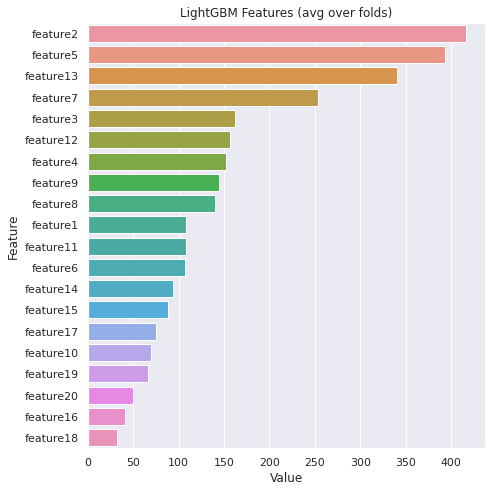

In [25]:
def plotImp(model, X , num = 20, fig_size = (7, 7)):
    feature_imp = pd.DataFrame({'Value':lgbm.feature_importances_,'Feature': X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()

plotImp(lgbm, X_train_un)

(29144, 7)
[ 92 441 162 168 385 121 220 139 126  71  99 157 389  91  87  42  80  27
  59  44]


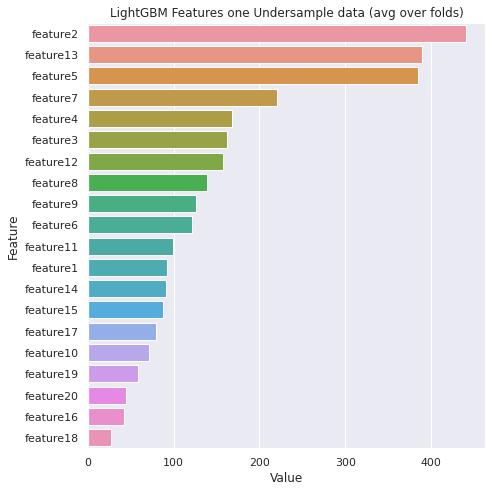

In [26]:
lgbm = lgb.LGBMClassifier(random_state=seed)
lgbm_un = lgbm.fit(X_train_un, y_train_un)
model = SelectFromModel(lgbm, prefit=True)
X_lgbm = model.transform(X_train_un)
print(X_lgbm.shape)
print(lgbm.feature_importances_)

def plotImp(model, X , num = 20, fig_size = (7, 7)):
    feature_imp = pd.DataFrame({'Value':lgbm_un.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features one Undersample data (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances_undersample-02.png')
    plt.show()

plotImp(lgbm_un, X_train_un)

In [27]:
# AdaBoostClassifier
adb = AdaBoostClassifier(random_state=seed)
adb_un = adb.fit(X_train_un,y_train_un)
model = SelectFromModel(adb_un, prefit=True)
X_adb = model.transform(X_train_un)
print(X_adb.shape)


# XGBClassifier
xgb = XGBClassifier(random_state=seed, eval_metric=loss_func)
xgb_un = xgb.fit(X_train_un,y_train_un)
model = SelectFromModel(xgb_un, prefit=True)
X_xgb = model.transform(X_train_un)
print(X_xgb.shape)

(29144, 8)
(29144, 5)


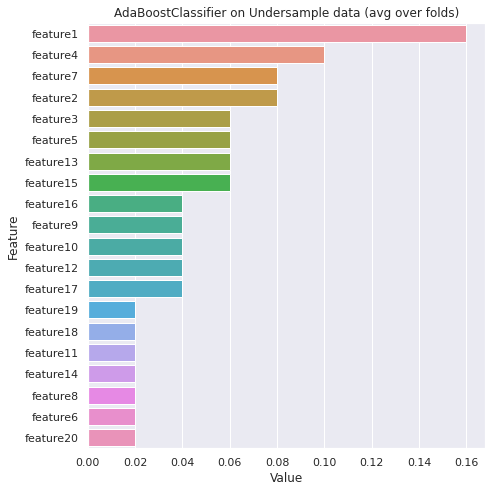

In [28]:
def plotImp(model, X , num = 20, fig_size = (7, 7)):
    feature_imp = pd.DataFrame({'Value':adb_un.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                        ascending=False)[0:num])
    plt.title('AdaBoostClassifier on Undersample data (avg over folds)')
    plt.tight_layout()
    plt.savefig('adb_importances_undersample-03.png')
    plt.show()

plotImp(adb_un, X_train_un)

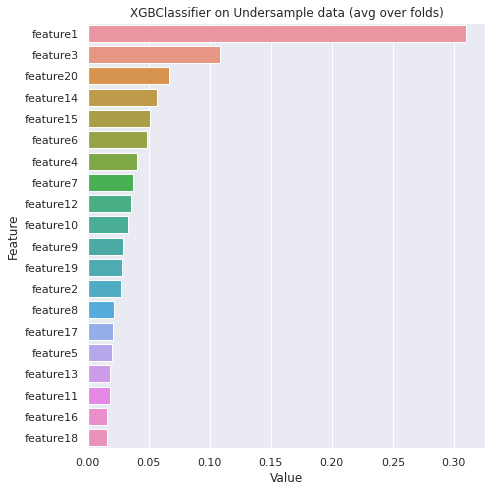

In [29]:
def plotImp(model, X , num = 20, fig_size = (7, 7)):
    feature_imp = pd.DataFrame({'Value': xgb_un.feature_importances_,'Feature': X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                        ascending=False)[0:num])
    plt.title('XGBClassifier on Undersample data (avg over folds)')
    plt.tight_layout()
    plt.savefig('xgb_importances_undersample-04.png')
    plt.show()

plotImp(xgb_un, X_train_un)
     

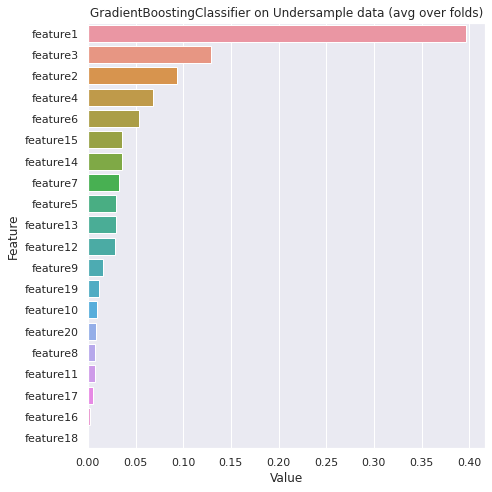

In [30]:
#GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state=seed)
gbm_un = gbm.fit(X_train_un, y_train_un)
model = SelectFromModel(gbm_un, prefit=True)
X_gbm = model.transform(X_train_un)
X_gbm.shape
def plotImp(model, X , num = 20, fig_size = (7, 7)):
    feature_imp = pd.DataFrame({'Value': gbm_un.feature_importances_,'Feature': X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                        ascending=False)[0:num])
    plt.title('GradientBoostingClassifier on Undersample data (avg over folds)')
    plt.tight_layout()
    plt.savefig('gbm_importances_undersample-05.png')
    plt.show()

plotImp(gbm_un, X_train_un)

In [31]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
    '''Function to perform 5 Folds Cross-Validation
    Parameters
    ----------
    model: Python Class, default=None
      This is the machine learning algorithm to be used for training.
    _X: array
    This is the matrix of features.
    _y: array
    This is the target variable.
    _cv: int, default=5
    Determines the number of folds for cross-validation.
    Returns
    -------
    The function returns a dictionary containing the metrics 'accuracy', 'precision',
    'recall', 'f1' for both training set and validation set.
    '''

    _scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    results = cross_validate(estimator=model,
                       X=_X,
                       y=_y,
                       cv=_cv,
                       scoring=_scoring,
                       return_train_score=True)

    return {"Training Accuracy scores": results['train_accuracy'],
      "Mean Training Accuracy": results['train_accuracy'].mean()*100,
      "Training Precision scores": results['train_precision'],
      "Mean Training Precision": results['train_precision'].mean(),
      "Training Recall scores": results['train_recall'],
      "Mean Training Recall": results['train_recall'].mean(),
      "Training F1 scores": results['train_f1'],
      "Mean Training F1 Score": results['train_f1'].mean(),
      "Training ROC-AUC": results['train_roc_auc'],
      "Mean Training ROC-AUC": results['train_roc_auc'].mean(),
      "Validation Accuracy scores": results['test_accuracy'],
      "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
      "Validation Precision scores": results['test_precision'],
      "Mean Validation Precision": results['test_precision'].mean(),
      "Validation Recall scores": results['test_recall'],
      "Mean Validation Recall": results['test_recall'].mean(),
      "Validation F1 scores": results['test_f1'],
      "Mean Validation F1 Score": results['test_f1'].mean(),
      "Validation ROC-AUC": results['test_roc_auc'],
      "Mean Validation ROC-AUC": results['test_roc_auc'].mean()
      }

In [32]:
X_train, X_test, X_val = X_train.values, X_test.values, X_val.values
X_train_over = X_train_over.values
X_train_un = X_train_un.values

In [33]:
LGBM_result = cross_validation(lgbm, X_train, y_train)
LGBM_result

{'Training Accuracy scores': array([0.83403646, 0.83200521, 0.83289062, 0.83270833, 0.83388021]),
 'Mean Training Accuracy': 83.31041666666667,
 'Training Precision scores': array([0.77673055, 0.77184922, 0.77488723, 0.77562414, 0.77778947]),
 'Mean Training Precision': 0.775376124281138,
 'Training Recall scores': array([0.63621547, 0.63407102, 0.63364213, 0.63163764, 0.63386806]),
 'Mean Training Recall': 0.63388686748507,
 'Training F1 scores': array([0.69948602, 0.69620909, 0.69718277, 0.69626478, 0.69849222]),
 'Mean Training F1 Score': 0.6975269748027835,
 'Training ROC-AUC': array([0.89491313, 0.89364474, 0.89435799, 0.89382148, 0.89446339]),
 'Mean Training ROC-AUC': 0.8942401472128083,
 'Validation Accuracy scores': array([0.81114583, 0.81625   , 0.813125  , 0.81385417, 0.80666667]),
 'Mean Validation Accuracy': 81.22083333333332,
 'Validation Precision scores': array([0.72985386, 0.74179983, 0.74518389, 0.73039216, 0.7275462 ]),
 'Mean Validation Precision': 0.734955187120597

In [34]:
y_pred = lgbm.predict(X_test)
# Ket qua lan 1
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.778
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      4178
           1       0.60      0.78      0.68      1822

    accuracy                           0.78      6000
   macro avg       0.75      0.78      0.76      6000
weighted avg       0.80      0.78      0.78      6000



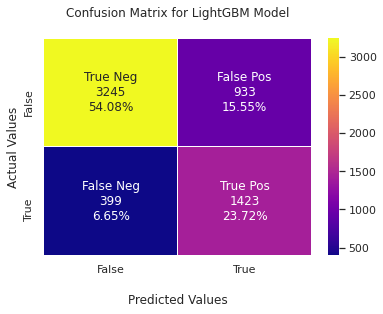

In [35]:
cm = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='plasma', lw=.5)

ax.set_title('Confusion Matrix for LightGBM Model\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [36]:
LGBM_result_un = cross_validation(lgbm_un, X_train_un, y_train_un)
LGBM_result_un

{'Training Accuracy scores': array([0.81621274, 0.81612696, 0.81672743, 0.81436843, 0.81570595]),
 'Mean Training Accuracy': 81.58283019004676,
 'Training Precision scores': array([0.81164934, 0.81182841, 0.81256349, 0.80958013, 0.81004128]),
 'Mean Training Precision': 0.8111325300338518,
 'Training Recall scores': array([0.82355464, 0.82303997, 0.82336793, 0.82208115, 0.82484131]),
 'Mean Training Recall': 0.8233770020429985,
 'Training F1 scores': array([0.81755865, 0.81739575, 0.81793004, 0.81578275, 0.8173743 ]),
 'Mean Training F1 Score': 0.8172082981912162,
 'Training ROC-AUC': array([0.89865884, 0.90004775, 0.90055839, 0.89844941, 0.90117492]),
 'Mean Training ROC-AUC': 0.8997778640332458,
 'Validation Accuracy scores': array([0.7718305 , 0.78349631, 0.77800652, 0.78212386, 0.78157172]),
 'Mean Validation Accuracy': 77.94057838985321,
 'Validation Precision scores': array([0.7659503 , 0.77905405, 0.77502545, 0.77815353, 0.77841873]),
 'Mean Validation Precision': 0.775320414156

In [37]:
## Undersampling test, val data
X_test_un, y_test_un = undersampling_data().fit_resample(X_test, y_test)
X_val_un, y_val_un = undersampling_data().fit_resample(X_val, y_val)

In [38]:
# Ket qua lan 2
y_pred_un = lgbm_un.predict(X_test_un)
cm = confusion_matrix(y_test_un, y_pred_un)
print(accuracy_score(y_test_un, y_pred_un))
print(classification_report(y_test_un, y_pred_un))

0.781284302963776
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1822
           1       0.78      0.78      0.78      1822

    accuracy                           0.78      3644
   macro avg       0.78      0.78      0.78      3644
weighted avg       0.78      0.78      0.78      3644



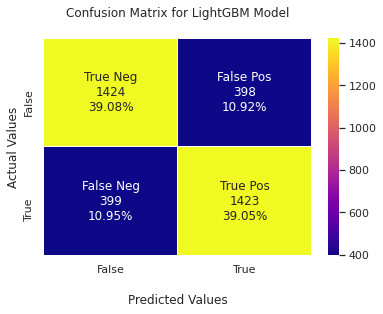

In [39]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='plasma', lw=.5)

ax.set_title('Confusion Matrix for LightGBM Model\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Fine Tuning

### Use Optuna to tune the model

In [40]:
# pip install optuna

In [ ]:
import optuna

pipeline = Pipeline(steps=[('model', lgbm)])

def objective(trial):
    params = {
        'model__num_leaves': trial.suggest_int('model__num_leaves', 20, 200),
        'model__min_data_in_leaf': trial.suggest_int('model__min_data_in_leaf', 50, 1500),
        'model__max_depth': trial.suggest_int('model__max_depth', 4, 20),
        'model__learning_rate': trial.suggest_float('model__learning_rate', 0.01, 0.1),
        'model__num_iterations': trial.suggest_int('model__num_iterations', 3, 27),
    }
    pipeline.set_params(**params)
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    return accuracy_score(y_test, predictions)

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(study_name='churn model', direction='maximize')
study.optimize(objective, n_trials=250, show_progress_bar=False)

In [42]:
print('Best parameters', study.best_params)
print('Best score', study.best_value)
print('Best model', study.best_trial)

Best parameters {'model__num_leaves': 190, 'model__min_data_in_leaf': 67, 'model__max_depth': 11, 'model__learning_rate': 0.09998507726440822, 'model__num_iterations': 27}
Best score 0.7963333333333333
Best model FrozenTrial(number=152, values=[0.7963333333333333], datetime_start=datetime.datetime(2023, 6, 25, 6, 44, 43, 454478), datetime_complete=datetime.datetime(2023, 6, 25, 6, 44, 44, 150882), params={'model__num_leaves': 190, 'model__min_data_in_leaf': 67, 'model__max_depth': 11, 'model__learning_rate': 0.09998507726440822, 'model__num_iterations': 27}, distributions={'model__num_leaves': IntDistribution(high=200, log=False, low=20, step=1), 'model__min_data_in_leaf': IntDistribution(high=1500, log=False, low=50, step=1), 'model__max_depth': IntDistribution(high=20, log=False, low=4, step=1), 'model__learning_rate': FloatDistribution(high=0.1, log=False, low=0.01, step=None), 'model__num_iterations': IntDistribution(high=27, log=False, low=3, step=1)}, user_attrs={}, system_attrs=

### Re-fit the model using the best parameters

In [43]:
pipeline.set_params(**study.best_params)
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, predictions))
print('AUC: ', roc_auc_score(y_test, predictions))
print(classification_report(y_test, predictions))

[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
Accuracy:  0.7963333333333333
AUC:  0.7271729129479123
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      4178
           1       0.71      0.55      0.62      1822

    accuracy                           0.80      6000
   macro avg       0.77      0.73      0.74      6000
weighted avg       0.79      0.80      0.79      6000



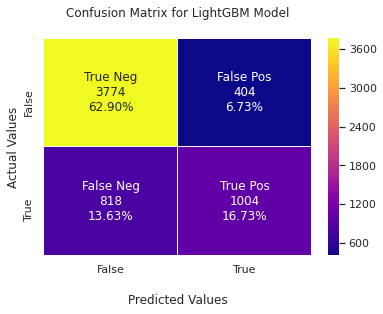

In [44]:
cm = confusion_matrix(y_test, predictions)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='plasma', lw=.5)

ax.set_title('Confusion Matrix for LightGBM Model\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [45]:
pipeline.set_params(**study.best_params)
pipeline.fit(X_train_un, y_train_un)
predictions = pipeline.predict(X_test_un)

print('Accuracy:', accuracy_score(y_test_un, predictions))
print('AUC:', roc_auc_score(y_test_un, predictions))
print(classification_report(y_test_un, predictions))

[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
Accuracy: 0.763172338090011
AUC: 0.7631723380900111
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1822
           1       0.76      0.77      0.76      1822

    accuracy                           0.76      3644
   macro avg       0.76      0.76      0.76      3644
weighted avg       0.76      0.76      0.76      3644



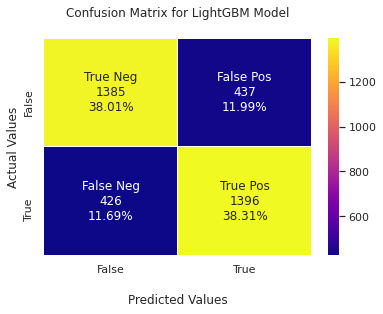

In [46]:
cm = confusion_matrix(y_test_un, predictions)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='plasma', lw=.5)

ax.set_title('Confusion Matrix for LightGBM Model\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [47]:
val_predictions = pipeline.predict(X_val)

print('Accuracy:', accuracy_score(y_val, val_predictions))
print('AUC:', roc_auc_score(y_val, val_predictions))
print(classification_report(y_val, val_predictions))

Accuracy: 0.7593333333333333
AUC: 0.7674289703794726
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      4179
           1       0.58      0.79      0.67      1821

    accuracy                           0.76      6000
   macro avg       0.73      0.77      0.74      6000
weighted avg       0.79      0.76      0.77      6000



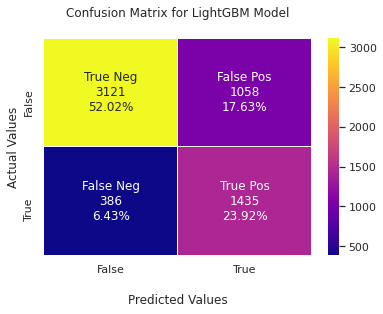

In [48]:
cm = confusion_matrix(y_val, val_predictions)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='plasma', lw=.5)

ax.set_title('Confusion Matrix for LightGBM Model\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()